In [1]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
geolife = pd.read_pickle('data_geolife/geolife.pkl')

In [3]:
geolife.head()

latitude   longitude            trip
user time                                                      
0    2008-10-23 02:53:04  39.984702  116.318417  20081023025304
     2008-10-23 02:53:10  39.984683  116.318450  20081023025304
     2008-10-23 02:53:15  39.984686  116.318417  20081023025304
     2008-10-23 02:53:20  39.984688  116.318385  20081023025304
     2008-10-23 02:53:25  39.984655  116.318263  20081023025304

In [4]:
len(geolife)

24876978

In [10]:
print(geolife.index.levels[1].sort_values()[3])
print(geolife.index.levels[1].max())

2007-04-12 09:31:32
2012-07-27 08:31:20


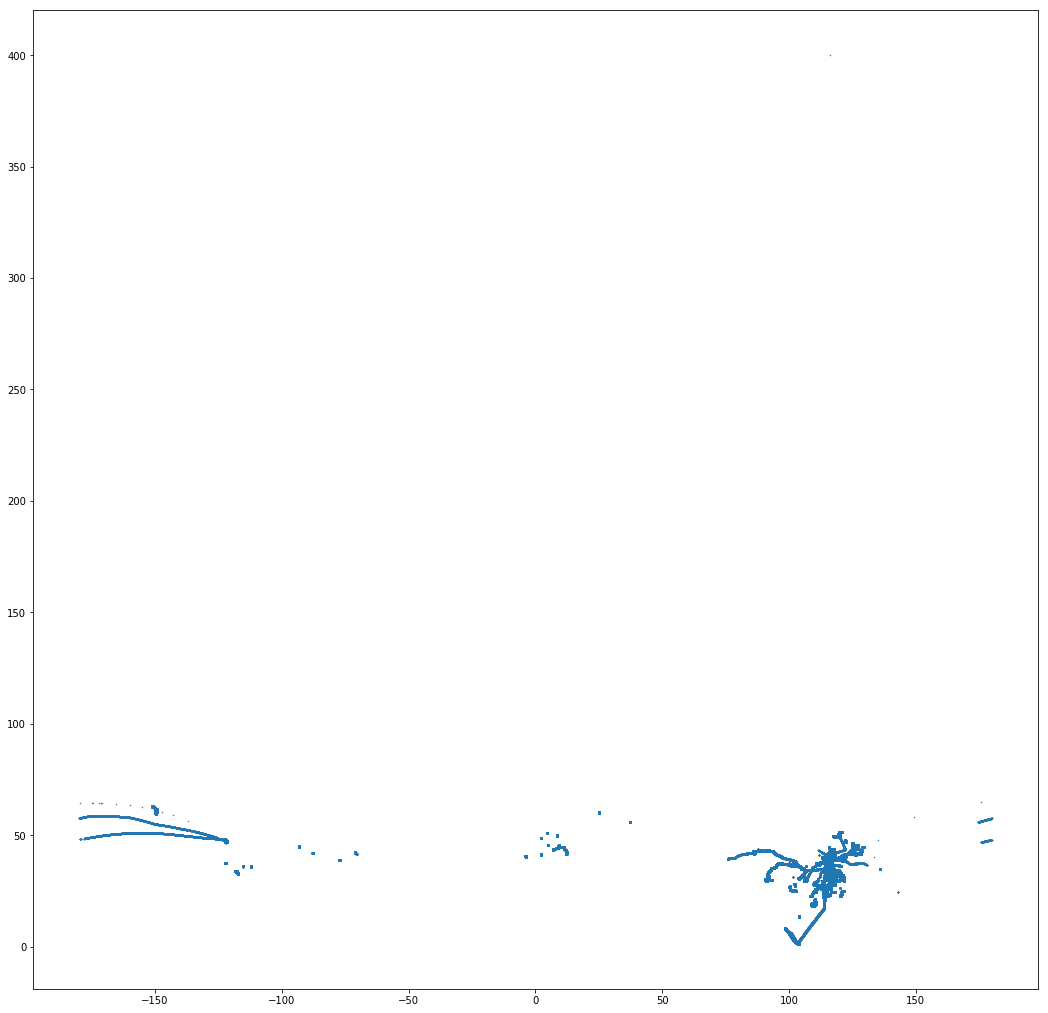

In [4]:
plt.figure(figsize=(18, 18))
plt.scatter(geolife['longitude'], geolife['latitude'], s=0.25)

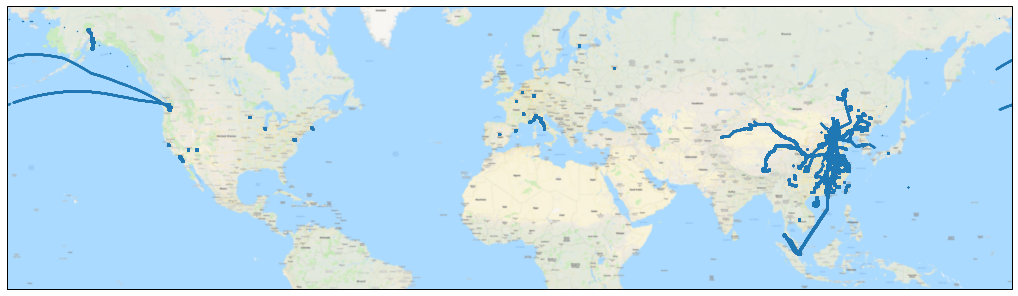

In [7]:
plt.figure(figsize=(18, 18))
img = cimgt.GoogleTiles()
ax = plt.axes(projection = img.crs)
ax.add_image(img, 5, interpolation = 'bicubic')

plt.scatter(geolife['longitude'], geolife['latitude'], s=0.25, transform=ccrs.PlateCarree())

In [4]:
start_end = pd.DataFrame({'first': geolife.reset_index().groupby('user')['time'].min(),
                          'last': geolife.reset_index().groupby('user')['time'].max()})

In [5]:
start_end.head()

,first,last
user,,
0,2008-10-23 02:53:04,2009-07-05 07:45:15
1,2008-10-23 05:53:05,2008-12-15 00:31:18
2,2008-10-23 12:45:23,2009-03-22 08:13:37
3,2008-10-23 17:58:54,2009-07-05 07:45:15
4,2008-10-23 17:58:52,2009-07-29 06:16:11


In [6]:
start_end.describe()

,first,last
count,182,182
unique,174,175
top,2008-05-09 08:12:31,2007-08-10 11:06:26
freq,3,3
first,2000-01-01 23:12:19,2007-04-24 02:27:43
last,2012-03-29 00:58:30,2012-07-27 08:31:20


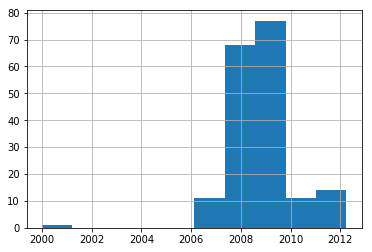

In [7]:
start_end['first'].hist()

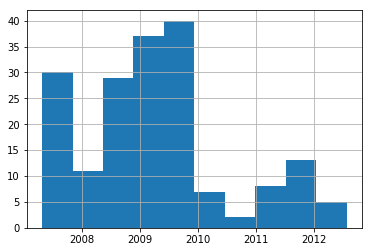

In [8]:
start_end['last'].hist()